In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Memuat data fitur warna RGB untuk pelatihan
train_data_rgb = pd.read_csv('C:/skripsi/coding_final/fitur_warna_tomat_RGB.csv')

# Memuat data fitur warna RGB untuk pengujian
test_data_rgb = pd.read_csv('C:/skripsi/coding_final/uji_fitur_warna_tomat_RGB.csv')

# Memuat data fitur warna HSV untuk pelatihan
train_data_hsv = pd.read_csv('C:/skripsi/coding_final/fitur_warna_tomat_HSV.csv')

# Memuat data fitur warna HSV untuk pengujian
test_data_hsv = pd.read_csv('C:/skripsi/coding_final/uji_fitur_warna_tomat_HSV.csv')

# Fungsi untuk mempersiapkan data
def prepare_data(train_data, test_data, feature_columns):
    X_train = train_data[feature_columns]
    y_train = train_data['Class']
    X_test = test_data[feature_columns]
    y_test = test_data['Class']
    
    # Mengencode label kelas
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    
    # Normalisasi fitur
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, y_train_encoded, X_test_scaled, y_test_encoded, label_encoder

# Persiapan data RGB
feature_columns_rgb = ['Mean_R', 'Mean_G', 'Mean_B', 'Std_R', 'Std_G', 'Std_B']
X_train_rgb, y_train_rgb, X_test_rgb, y_test_rgb, label_encoder_rgb = prepare_data(train_data_rgb, test_data_rgb, feature_columns_rgb)

# Persiapan data HSV
feature_columns_hsv = ['Mean_H', 'Mean_S', 'Mean_V', 'Std_H', 'Std_S', 'Std_V']
X_train_hsv, y_train_hsv, X_test_hsv, y_test_hsv, label_encoder_hsv = prepare_data(train_data_hsv, test_data_hsv, feature_columns_hsv)


In [44]:
import pandas as pd

# Memuat data latih dan data uji
train_data = pd.read_csv('C:/skripsi/coding_final/fitur_warna_tomat_RGB.csv')
test_data = pd.read_csv('C:/skripsi/coding_final/uji_fitur_warna_tomat_RGB.csv')

# Distribusi kelas pada data latih
print("Distribusi Kelas pada Data Latih")
print(train_data['Class'].value_counts())

# Distribusi kelas pada data uji
print("\nDistribusi Kelas pada Data Uji")
print(test_data['Class'].value_counts())

Distribusi Kelas pada Data Latih
Class
matang     85
mengkal    85
mentah     85
Name: count, dtype: int64

Distribusi Kelas pada Data Uji
Class
mengkal    52
matang     50
mentah     50
Name: count, dtype: int64


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Fungsi untuk membangun model ANN
def build_ann(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # 3 kelas untuk klasifikasi kematangan tomat
    return model

# Membangun model untuk data RGB
model_rgb = build_ann(X_train_rgb.shape[1])

# Membangun model untuk data HSV
model_hsv = build_ann(X_train_hsv.shape[1])

# Melihat arsitektur model
model_rgb.summary()
model_hsv.summary()


c:\Users\bjolnir\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,803 (18.76 KB)

 Trainable params: 4,803 (18.76 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,803 (18.76 KB)

 Trainable params: 4,803 (18.76 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Fungsi untuk mengompilasi model ANN
def compile_ann(model):
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Mengompilasi model untuk data RGB
compile_ann(model_rgb)

# Mengompilasi model untuk data HSV
compile_ann(model_hsv)


In [47]:
# Fungsi untuk melatih model ANN
def train_ann(model, X_train, y_train, epochs=50, batch_size=10):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
    return history

# Melatih model ANN dengan data RGB
history_rgb = train_ann(model_rgb, X_train_rgb, y_train_rgb)

# Melatih model ANN dengan data HSV
history_hsv = train_ann(model_hsv, X_train_hsv, y_train_hsv)


Epoch 1/50


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6091 - loss: 0.9591 - val_accuracy: 0.0196 - val_loss: 1.4204
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9599 - loss: 0.5327 - val_accuracy: 0.0196 - val_loss: 2.1623
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9631 - loss: 0.2820 - val_accuracy: 0.0196 - val_loss: 3.1271
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9923 - loss: 0.1329 - val_accuracy: 0.0196 - val_loss: 3.8970
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9877 - loss: 0.0787 - val_accuracy: 0.0196 - val_loss: 4.3460
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9977 - loss: 0.0434 - val_accuracy: 0.0196 - val_loss: 4.5376
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9983 - loss: 0.0348 - val_accuracy: 0.0196 - val_loss: 4.4464
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9877 - loss: 0.0407 - val_accuracy: 0.0196 - val_loss: 4.2333
Ep

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9093 - loss: 0.6961     
Accuracy: 87.50%
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
              precision    recall  f1-score   support

      matang       0.85      1.00      0.92        50
     mengkal       1.00      0.63      0.78        52
      mentah       0.83      1.00      0.91        50

    accuracy                           0.88       152
   macro avg       0.89      0.88      0.87       152
weighted avg       0.89      0.88      0.87       152

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8457 - loss: 2.3812 
Accuracy: 80.92%
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

      matang       0.63      1.00      0.78        50
     mengkal       1.00      0.44      0.61        52
      mentah       1.00      1.00      1.00        50

    accuracy                           0.81       152
   macro avg       0.88      0.81      0.80       152
weighted avg       0.88      0.81  

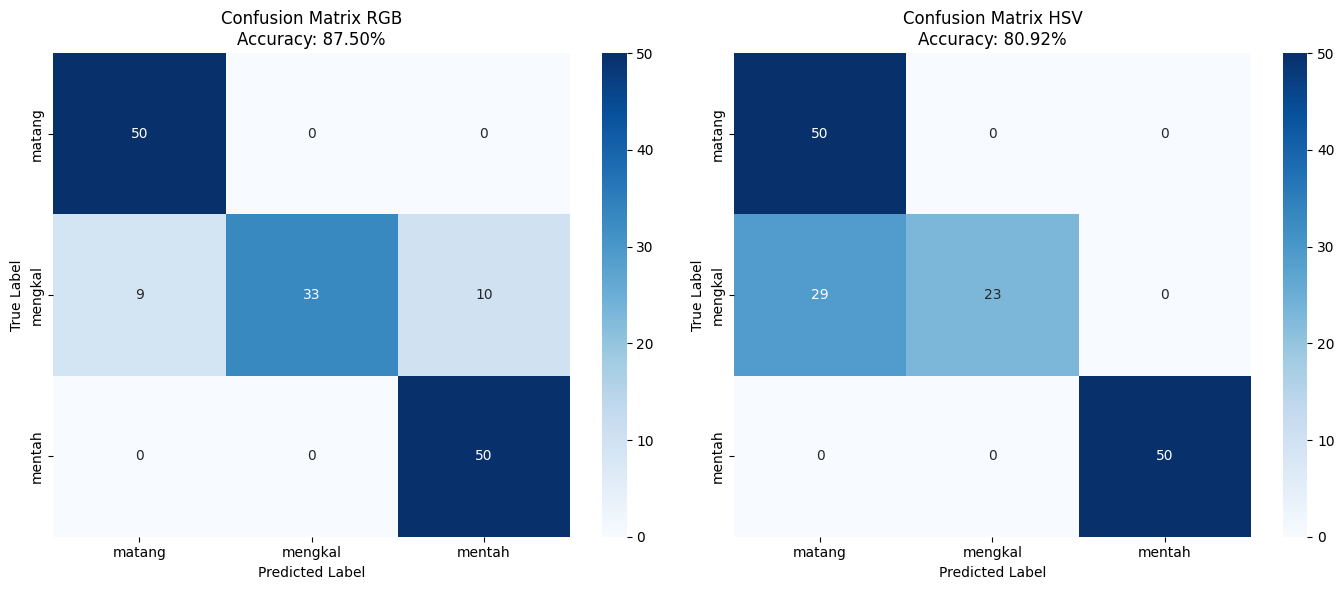

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Fungsi untuk mengevaluasi model
def evaluate_ann(model, X_test, y_test, label_encoder):
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))
    
    conf_matrix = confusion_matrix(y_test, y_pred_classes)
    
    return conf_matrix, accuracy

# Evaluasi model RGB
conf_matrix_rgb, accuracy_rgb = evaluate_ann(model_rgb, X_test_rgb, y_test_rgb, label_encoder_rgb)

# Evaluasi model HSV
conf_matrix_hsv, accuracy_hsv = evaluate_ann(model_hsv, X_test_hsv, y_test_hsv, label_encoder_hsv)

# Plotting Confusion Matrix berdampingan
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_rgb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_rgb.classes_, yticklabels=label_encoder_rgb.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix RGB\nAccuracy: {accuracy_rgb*100:.2f}%')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_hsv, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_hsv.classes_, yticklabels=label_encoder_hsv.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix HSV\nAccuracy: {accuracy_hsv*100:.2f}%')

plt.tight_layout()
plt.show()


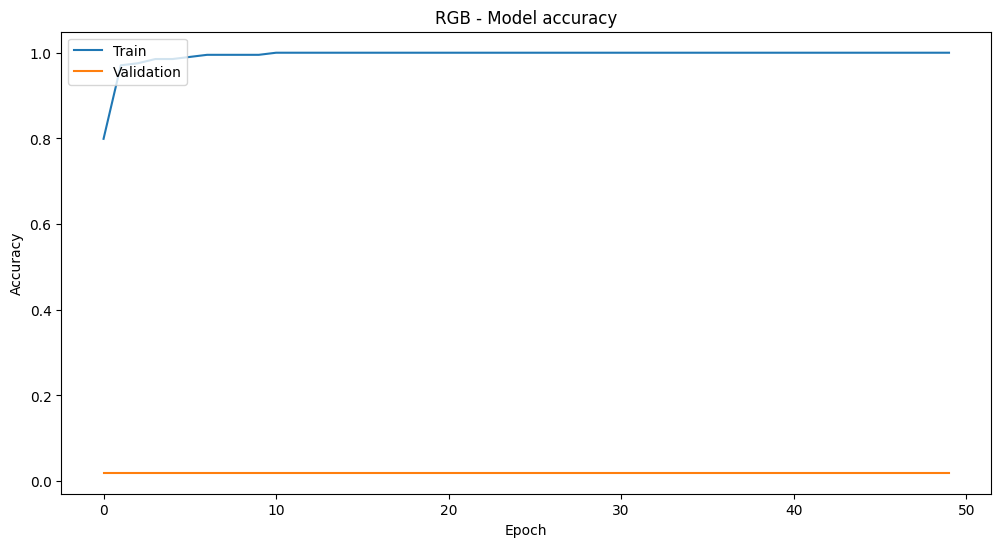

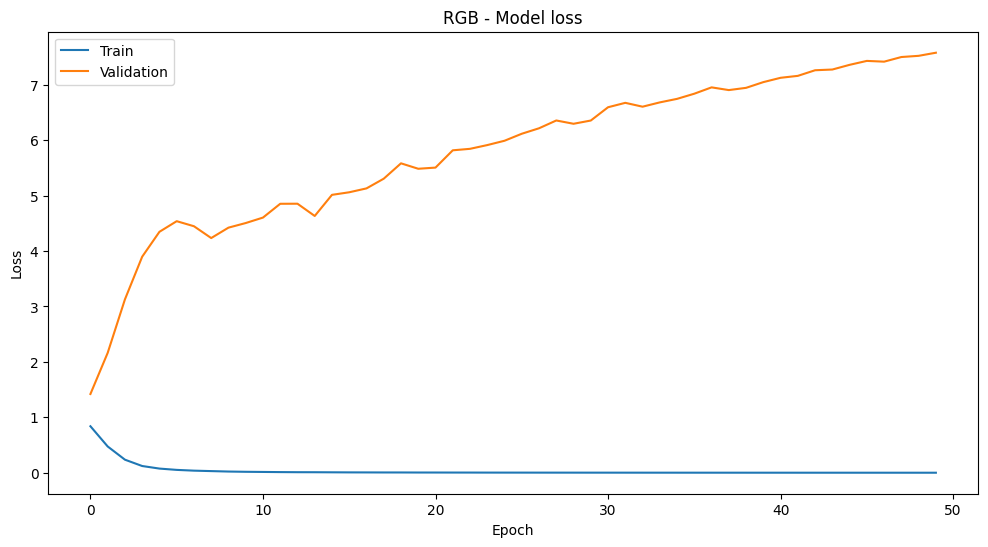

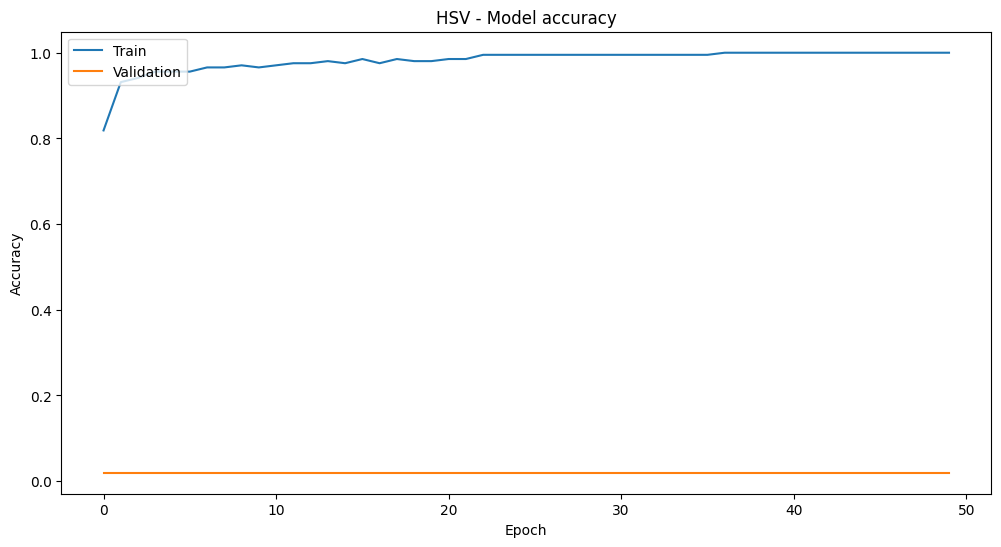

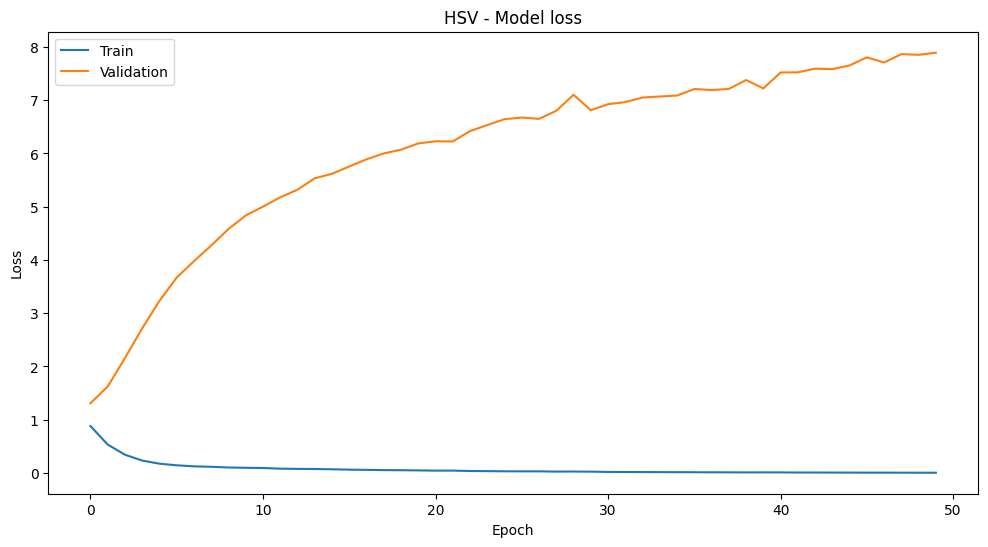

In [49]:
# Fungsi untuk plotting hasil pelatihan
def plot_training_history(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} - Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} - Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plotting untuk RGB
plot_training_history(history_rgb, 'RGB')

# Plotting untuk HSV
plot_training_history(history_hsv, 'HSV')
